# Assignment 5
## Madi Hamilton

### Research Question: Are there geographic disparity trends in food insecurity and coronary heart disease in Los Angeles County?

### Data Source: ACS data by census tract from 2016-2020 in Los Angeles County
#### Variables: percentage of the population with income below the 100% poverty level, percentage of the population with income below the 200% poverty level, coronary heart disease prevalence (2020), total population, age, percentage of hispanic or latino residents

### Data Source: USC Neighborhood Data for Social Change by census tract in Los Angeles County
#### Variables: SNAP acceptance rate (number of establishments per 10,000 residents) in 2023


### Adding Data

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import contextily as cx

In [2]:
#reading in the data
food = pd.read_csv('Data/output_JF.csv', dtype= {'geoid20_x':str})
food.head()

,geoid20_x,FIPS,ShapeSTArea,ShapeSTLength,geometry,pop_below_100_pct,pop_below_200_pct,chd_pct,total_pop,snap_rate,...,0-19 years,20 to 44 years,45 to 64 years,65 years and over,Percent 65 years and over,85 years and over,Hispanic or Latino,Percent Hispanic or Latino,Not Hispanic or Latino,geoid20_y
0,101122,6037101122,2.845774e+07,31671.455840,POLYGON ((-118.27743420965825 34.2599078772977...,4.429760,10.499266,5.107527,4247,2.354603,...,729,1039,1487,909,21.8,149,362,8.7,3802,101122
1,101220,6037101220,7.522093e+06,12698.783810,POLYGON ((-118.27817921018234 34.2557728762786...,16.900661,34.781456,6.201288,3583,8.372872,...,686,1107,1119,569,16.3,39,1463,42.0,2018,101220
2,101221,6037101221,3.812000e+06,9161.710543,POLYGON ((-118.28734521088782 34.2559088762374...,20.601543,43.918018,5.587014,3723,2.686006,...,805,1336,882,733,19.5,182,1204,32.1,2552,101221
3,101222,6037101222,3.191371e+06,9980.600461,POLYGON ((-118.28593621132488 34.2558998758872...,38.019875,66.654396,5.590622,2690,7.434944,...,542,1021,786,459,16.3,70,1295,46.1,1513,101222
4,102107,6037102107,1.390833e+08,63679.434270,POLYGON ((-118.33001021867813 34.2596818742774...,12.399194,35.635082,6.808279,3920,2.551020,...,538,1161,1093,785,21.9,212,886,24.8,2691,102107


In [3]:
#later, I'll merge with a census tract shapefile, so there's no need for this geometry column
food = food.drop(['geometry'],axis=1)

In [4]:
food.head()

,geoid20_x,FIPS,ShapeSTArea,ShapeSTLength,pop_below_100_pct,pop_below_200_pct,chd_pct,total_pop,snap_rate,Age Total population,...,0-19 years,20 to 44 years,45 to 64 years,65 years and over,Percent 65 years and over,85 years and over,Hispanic or Latino,Percent Hispanic or Latino,Not Hispanic or Latino,geoid20_y
0,101122,6037101122,2.845774e+07,31671.455840,4.429760,10.499266,5.107527,4247,2.354603,4164,...,729,1039,1487,909,21.8,149,362,8.7,3802,101122
1,101220,6037101220,7.522093e+06,12698.783810,16.900661,34.781456,6.201288,3583,8.372872,3481,...,686,1107,1119,569,16.3,39,1463,42.0,2018,101220
2,101221,6037101221,3.812000e+06,9161.710543,20.601543,43.918018,5.587014,3723,2.686006,3756,...,805,1336,882,733,19.5,182,1204,32.1,2552,101221
3,101222,6037101222,3.191371e+06,9980.600461,38.019875,66.654396,5.590622,2690,7.434944,2808,...,542,1021,786,459,16.3,70,1295,46.1,1513,101222
4,102107,6037102107,1.390833e+08,63679.434270,12.399194,35.635082,6.808279,3920,2.551020,3577,...,538,1161,1093,785,21.9,212,886,24.8,2691,102107


In [5]:
food.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1587 entries, 0 to 1586
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   geoid20_x                   1587 non-null   object 
 1   FIPS                        1587 non-null   int64  
 2   ShapeSTArea                 1587 non-null   float64
 3   ShapeSTLength               1587 non-null   float64
 4   pop_below_100_pct           1586 non-null   float64
 5   pop_below_200_pct           1586 non-null   float64
 6   chd_pct                     1587 non-null   float64
 7   total_pop                   1587 non-null   int64  
 8   snap_rate                   1587 non-null   float64
 9   Age Total population        1587 non-null   int64  
 10  Under 18 years              1587 non-null   int64  
 11  Percent Under 18 years      1467 non-null   float64
 12  0-19 years                  1587 non-null   int64  
 13  20 to 44 years              1587 

### Merging Data

In [6]:
tracts = gpd.read_file('Data/tl_2020_06_tract.shp')

In [7]:
tracts.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,06,029,004402,06029004402,44.02,Census Tract 44.02,G5020,S,1865739,0,+35.5917343,-119.3337642,"POLYGON ((-119.33828 35.58143, -119.33827 35.5..."
1,06,047,000802,06047000802,8.02,Census Tract 8.02,G5020,S,2321653,0,+37.3433591,-120.5854604,"POLYGON ((-120.59599 37.34121, -120.59596 37.3..."
2,06,085,501402,06085501402,5014.02,Census Tract 5014.02,G5020,S,522620,0,+37.3453341,-121.8665169,"POLYGON ((-121.87381 37.34412, -121.87361 37.3..."
3,06,005,000102,06005000102,1.02,Census Tract 1.02,G5020,S,456204155,7940832,+38.5496993,-120.2509786,"POLYGON ((-120.61016 38.41560, -120.61000 38.4..."
4,06,029,004901,06029004901,49.01,Census Tract 49.01,G5020,S,1459379,0,+35.7837173,-119.2462266,"POLYGON ((-119.25262 35.79043, -119.25259 35.7..."


In [8]:
tracts.info(verbose=True,show_counts=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 9129 entries, 0 to 9128
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   STATEFP   9129 non-null   object  
 1   COUNTYFP  9129 non-null   object  
 2   TRACTCE   9129 non-null   object  
 3   GEOID     9129 non-null   object  
 4   NAME      9129 non-null   object  
 5   NAMELSAD  9129 non-null   object  
 6   MTFCC     9129 non-null   object  
 7   FUNCSTAT  9129 non-null   object  
 8   ALAND     9129 non-null   int64   
 9   AWATER    9129 non-null   int64   
 10  INTPTLAT  9129 non-null   object  
 11  INTPTLON  9129 non-null   object  
 12  geometry  9129 non-null   geometry
dtypes: geometry(1), int64(2), object(10)
memory usage: 927.3+ KB


In [9]:
tracts['geoid20_x']=tracts.TRACTCE

<Axes: >

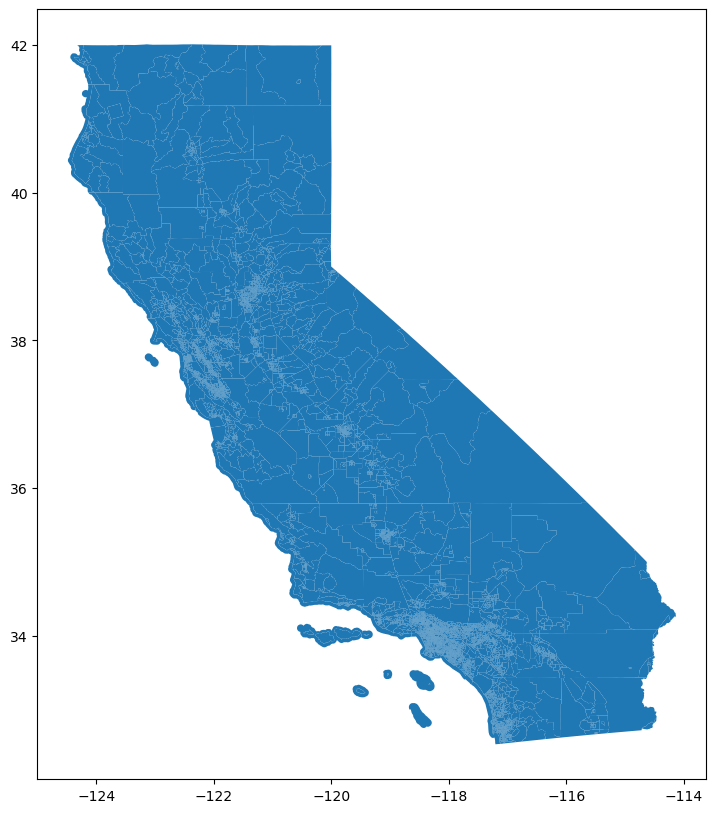

In [10]:
#this file contains census tracts for all of California, I need to clip to just LA County census tracts
tracts.plot(figsize=(12,10))

In [11]:
tracts['COUNTYFP'].unique()

array(['029', '047', '085', '005', '019', '073', '037', '071', '033',
       '053', '083', '111', '013', '035', '039', '065', '095', '103',
       '057', '001', '113', '025', '043', '115', '109', '101', '041',
       '009', '099', '079', '017', '027', '075', '023', '045', '087',
       '061', '097', '081', '059', '089', '077', '105', '093', '055',
       '067', '007', '011', '049', '069', '015', '107', '021', '063',
       '031', '051', '003', '091'], dtype=object)

In [12]:
#clipping to LA County census tracts
latracts = tracts.query("COUNTYFP == '037'")

<Axes: >

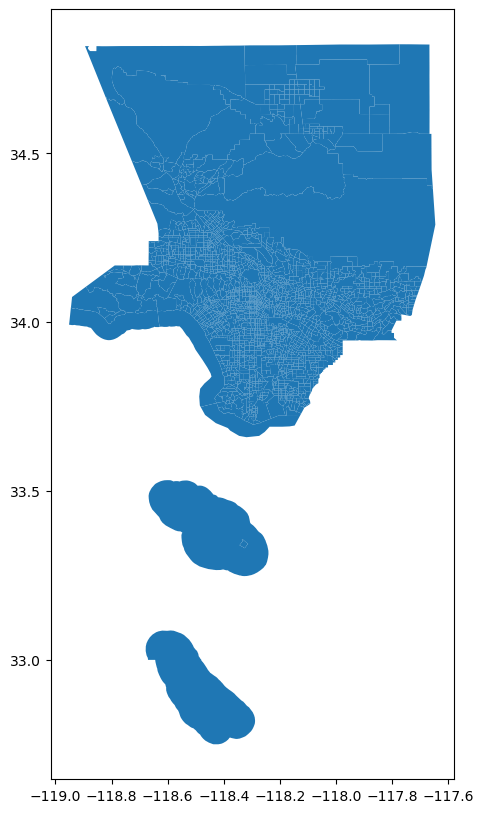

In [13]:
latracts.plot(figsize=(12,10))

In [15]:
#merging the data
tracts_census= latracts.merge(food,on="geoid20_x")

In [16]:
#checking that it is a geodataframe, not a dataframe
tracts_census.info(verbose=True,show_counts=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1587 entries, 0 to 1586
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   STATEFP                     1587 non-null   object  
 1   COUNTYFP                    1587 non-null   object  
 2   TRACTCE                     1587 non-null   object  
 3   GEOID                       1587 non-null   object  
 4   NAME                        1587 non-null   object  
 5   NAMELSAD                    1587 non-null   object  
 6   MTFCC                       1587 non-null   object  
 7   FUNCSTAT                    1587 non-null   object  
 8   ALAND                       1587 non-null   int64   
 9   AWATER                      1587 non-null   int64   
 10  INTPTLAT                    1587 non-null   object  
 11  INTPTLON                    1587 non-null   object  
 12  geometry                    1587 non-null   geometry
 13  geoid20_x 

### Mapping Our Variables

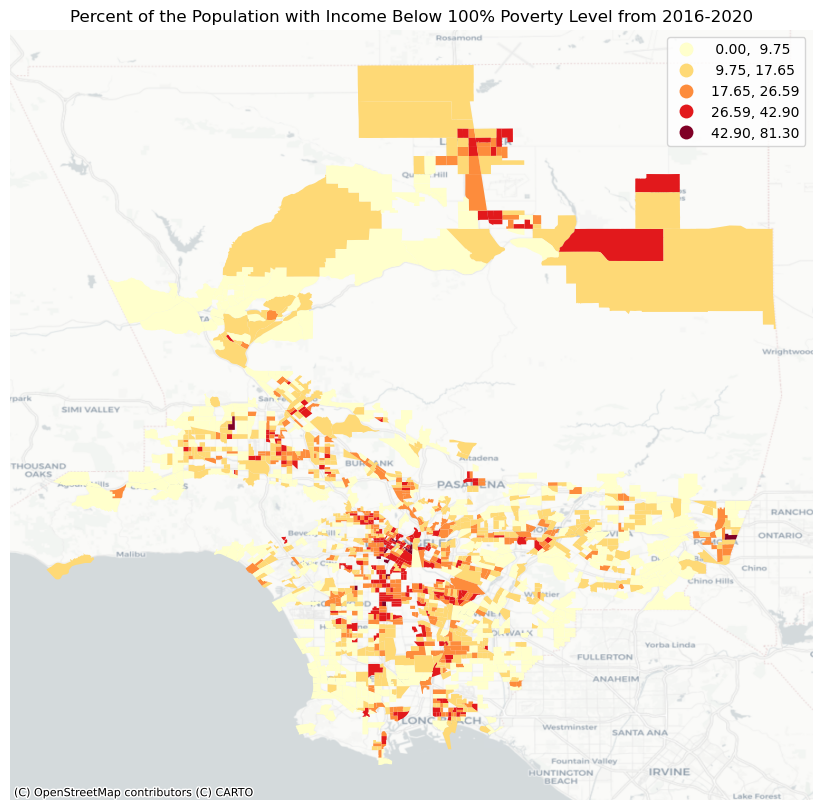

In [17]:
ax = tracts_census.plot(figsize=(12,10),
                   column='pop_below_100_pct',
                   legend=True,
                   scheme='NaturalBreaks',
                    cmap='YlOrRd')
ax.set_axis_off()
ax.set_title('Percent of the Population with Income Below 100% Poverty Level from 2016-2020')
cx.add_basemap(ax,crs=4326,
               source=cx.providers.CartoDB.Positron)
plt.savefig('pop_below_100_pct.png')

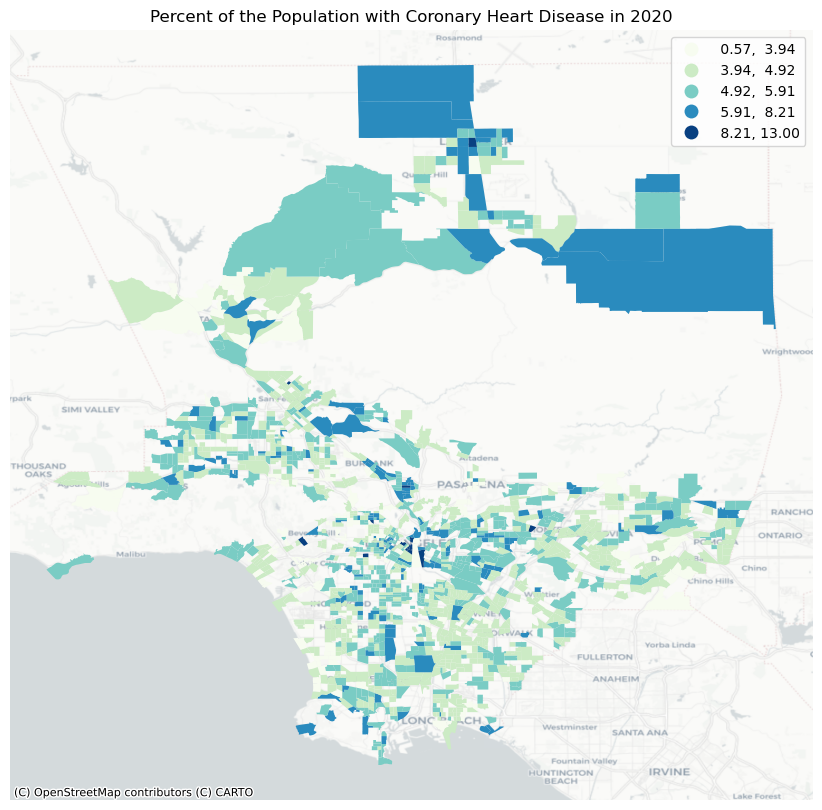

In [18]:
ax = tracts_census.plot(figsize=(12,10),
                   column='chd_pct',
                   legend=True,
                   scheme='NaturalBreaks',
                    cmap='GnBu')
ax.set_axis_off()
ax.set_title('Percent of the Population with Coronary Heart Disease in 2020')
cx.add_basemap(ax,crs=4326,
               source=cx.providers.CartoDB.Positron)
plt.savefig('chd_pct.png')

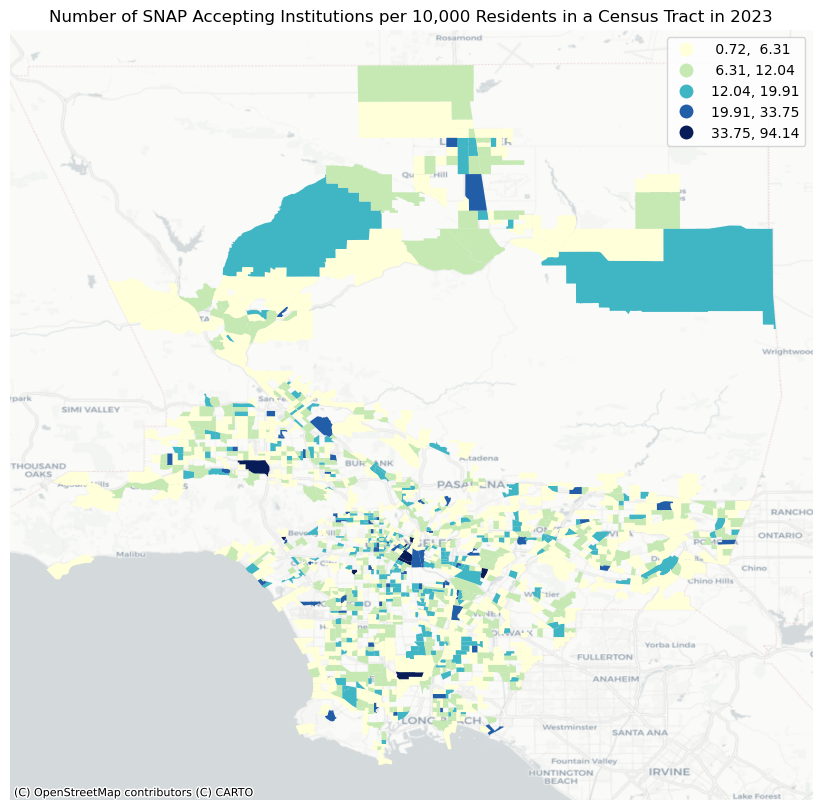

In [30]:
ax = tracts_census.plot(figsize=(12,10),
                   column='snap_rate',
                   legend=True,
                   scheme='NaturalBreaks',
                    cmap='YlGnBu')
ax.set_axis_off()
ax.set_title('Number of SNAP Accepting Institutions per 10,000 Residents in a Census Tract in 2023')
cx.add_basemap(ax,crs=4326,
               source=cx.providers.CartoDB.Positron)
plt.savefig('snap_rate.png')

### Madi Hamilton: I created three chorpleth maps describing the spatial distribution of the percent of the population below the 100% poverty level, the prevalence of coronary heart disease, and SNAP acceptance rate.